# Stationarity, MA(q) and AR(p) processes

> We will introduce few important notions in time series analysis: Stationarity, Backward shift operator, Invertibility, and Duality. We begin to explore Autoregressive processes and Yule-Walker equations.This is the Summary of lecture "Practical Time Series Analysis" from Coursera.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [R, Coursera, Time_Series_Analysis]
- image: 

In [3]:
options(repr.plot.width = 16, repr.plot.height = 9)

## Stationarity - Generalizing from an individual to a group

### Stationarity - White Noise and Random Walks

#### White noise is Stationary

Consider a discrete family of independent, identically distributed normal random variables (often Gaussian)

$$ X_t \sim iid(0, \sigma^2) $$
$$ X_t \sim iid N(0, \sigma^2) $$

Mean function $\mu(t) = 0$ is obviously constant, so consider

$$ \gamma(t_1, t_2) = \begin{cases} 0 \quad t_1 \neq t_2 \\ \sigma^2 \quad t_1 = t_2 \end{cases} $$

#### Random Walks are not stationary!

Started with IID Random variables $Z_t \sim iid (\mu, \sigma^2)$

Build a walk with $t$ steps

$$ X_1 = Z_1 \\ X_2 = X_1 + Z_2 = Z_1 + Z_2 \\
X_3 = X_2 + Z_3 = Z_1 + Z_2 + Z_3 \\ \vdots \\
X_t = X_{t-1} + Z_t = \sum_{i=1}^t Z_i $$

$$ \mathbb{E}[X_t] = \mathbb{E}[\sum_{i=1}^t Z_i] = \sum_{i=1}^t \mathbb{E}[Z_i] = t \cdot \mu \\
 \mathbb{V}[X_t] = \mathbb{V}[\sum_{i=1}^t Z_i] = \sum_{i=1}^t \mathbb{V}[Z_i] = t \cdot \sigma^2 $$
 
> Note: Independent random variables have variances which add. All random variables have means which add.

#### Moving Average Processes are Stationary!

Start with IID random variables $Z_t \sim iid(0, \sigma^2)$

$$ MA(q)\text{ process: } \qquad X_t = \beta_0 Z_t + \beta_1 Z_{t-1} + \cdots + \beta_q Z_{t-q} $$

$q$ tells us how far back to look along the white noise sequence for our weighted average.

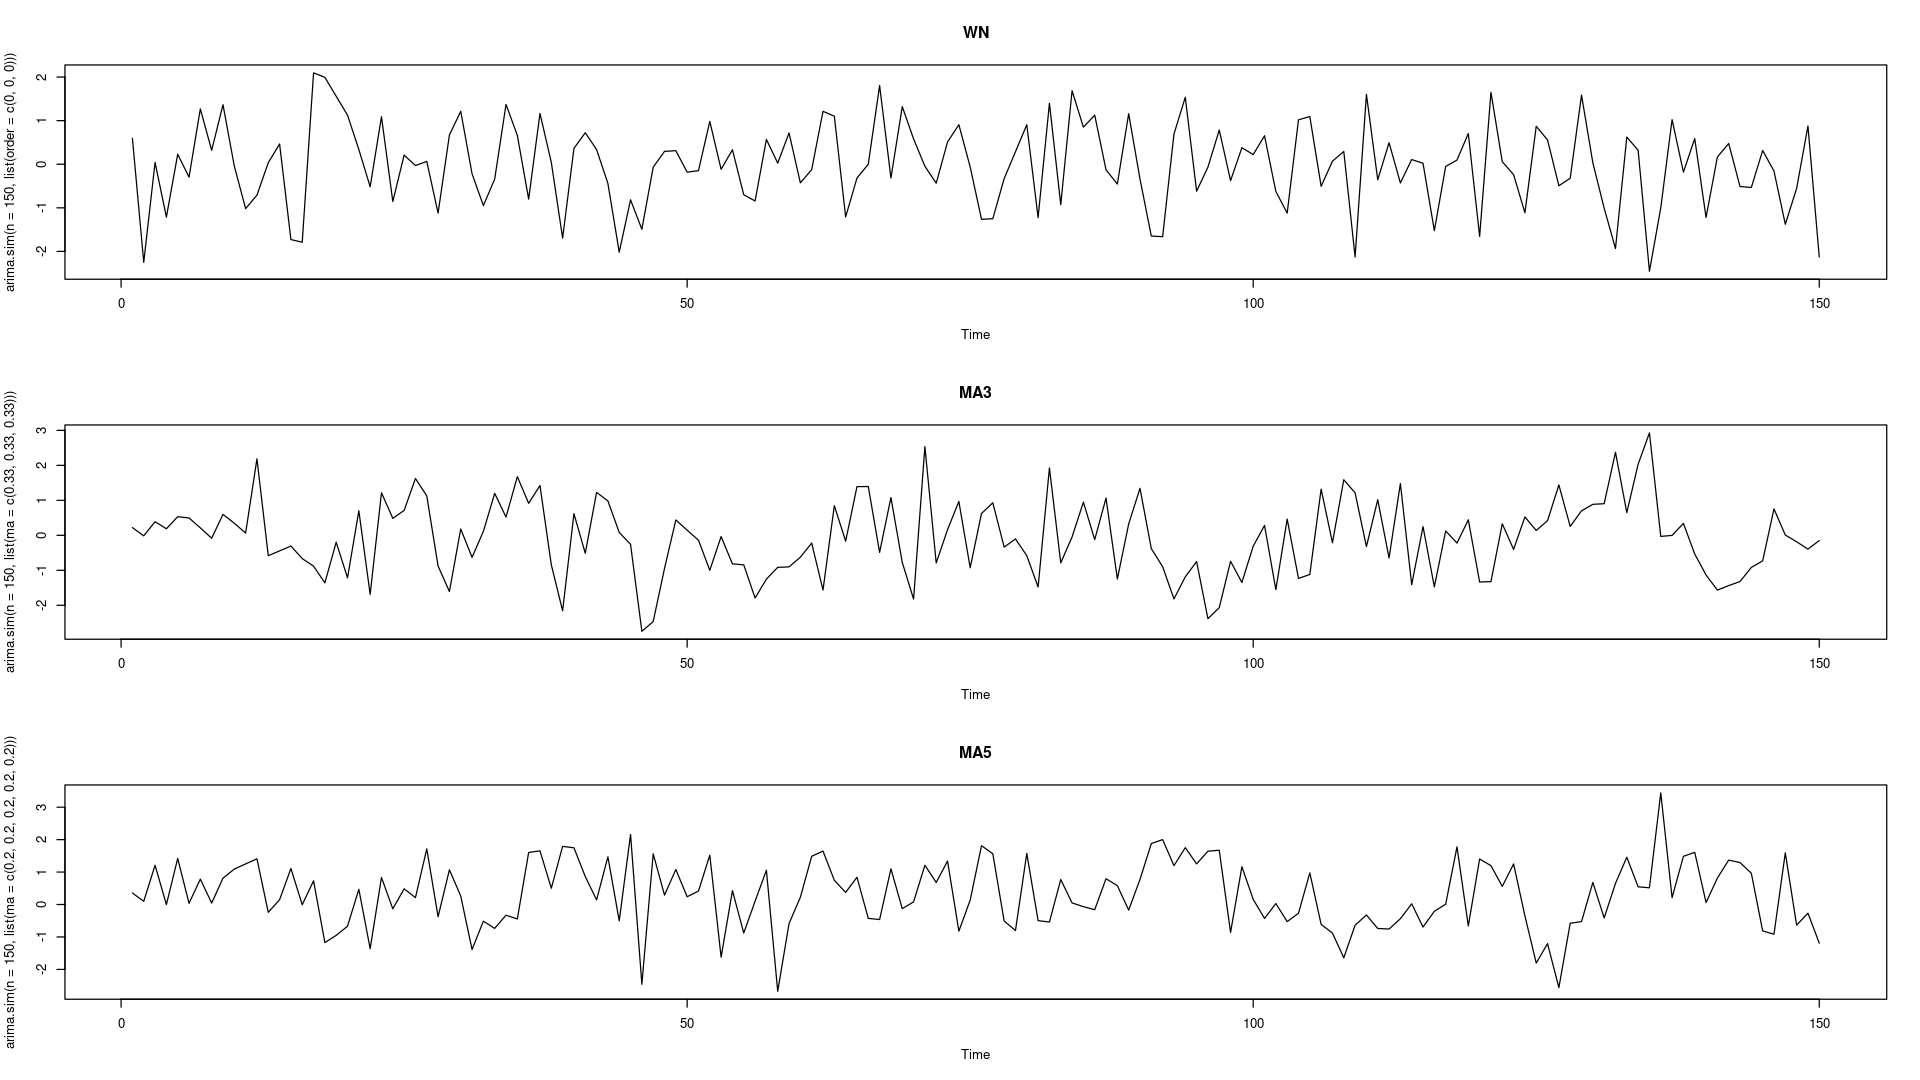

In [4]:
par(mfrow=c(3,1))
plot( arima.sim(n=150, list(order=c(0,0,0) )  ), main="WN" );
plot( arima.sim(n=150, list(ma=c(0.33, 0.33, 0.33)      )  ) , main="MA3");
plot( arima.sim(n=150, list(ma=c(0.2, 0.2, 0.2, 0.2, 0.2) )  ), main="MA5" );

### Stationarity - ACF of Moving Average

#### Moving Average Processes are stationary!

Look at the covariance at two locations along a moving average process:

$$ cov[X_t, X_{t+k}] = \mathbb{E}[X_t, X_{t+k}] - \mathbb{E}[X_t] \mathbb{E}[X_{t+k}] \\
\mathbb{E}[X_t] = \mathbb{E}[X_{t+k}] = 0 \Rightarrow cov[X_t, X_{t+k}] = \mathbb{E}[X_t, X_{t+k}] \\ 
cov[X_t, X_{t+k}] = \mathbb{E}[(\beta_0 Z_t + \cdots + \beta_q Z_{t-q}) \cdot (\beta_0 Z_{t+k} + \cdots + \beta_q Z_{t+l-q})]$$